In [94]:
# for the sine function, what does the typical plot look like?
import numpy as np

step_size = 0.01
xs = np.arange(0,10,step_size)
## ys = 2*np.sin(3*np.pi*xs) + 3*np.cos(2*np.pi*xs) ## more quasiperiodic type signal
ys = np.sin(np.pi*xs) ## exactly periodic

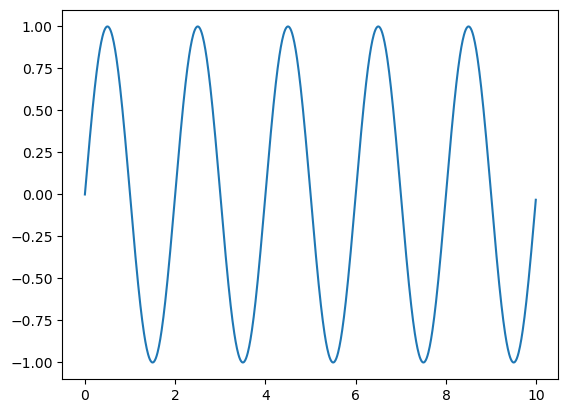

In [95]:
import matplotlib.pyplot as plt
plt.plot(xs, ys)

In [96]:
def sliding_window(time_series, d, tau):
    ''' Given a time series, return [f(t), f(t + tau), f(t + 2 * tau), ..., f(t + d * tau)];
    i.e. return a sliding window embedding'''
    sw_embedding = []
    for i in range(len(time_series) - ((d - 1) * tau)):  # -1 b/c python loop ends at last index
        sw_embedding.append(time_series[i:i + d * tau:tau])
    return sw_embedding

In [97]:
from ripser import ripser
import sys
sys.path.append('../data/simple_egs')
import SphereExample as sphere

T = 2
window_length_test_values = np.linspace(0,1.5*T,15)[1:]
dim_test_values = range(2,6)

mpers_results = np.zeros((len(window_length_test_values),len(dim_test_values)))
top_diff_results = np.zeros((len(window_length_test_values),len(dim_test_values)))
PD_results = {}

for i,wl in enumerate(window_length_test_values):
    for j,d in enumerate(dim_test_values):
        print(wl/T,d)
        
        tau = wl/d
    
        # construct a sliding window embedding
        swe = sliding_window(ys, d=d, tau= int(wl/(d*step_size)) )
        
        PDs = ripser(np.array(swe), maxdim=1, coeff=2)['dgms']
        
        PD_results[i,j] = PDs[1]
        res = (sphere.get_maximum_persistence(PDs)[1],sphere.get_top_diff_persistence(PDs)[1], sphere.get_num_features(PDs)[1])
        

        mpers_results[i,j] = res[0]
        top_diff_results[i,j] = res[1]

0.10714285714285714 2
0.10714285714285714 3
0.10714285714285714 4
0.10714285714285714 5
0.21428571428571427 2
0.21428571428571427 3
0.21428571428571427 4
0.21428571428571427 5
0.3214285714285714 2
0.3214285714285714 3
0.3214285714285714 4
0.3214285714285714 5
0.42857142857142855 2
0.42857142857142855 3
0.42857142857142855 4
0.42857142857142855 5
0.5357142857142857 2
0.5357142857142857 3
0.5357142857142857 4
0.5357142857142857 5
0.6428571428571428 2
0.6428571428571428 3
0.6428571428571428 4
0.6428571428571428 5
0.75 2
0.75 3
0.75 4
0.75 5
0.8571428571428571 2
0.8571428571428571 3
0.8571428571428571 4
0.8571428571428571 5
0.9642857142857142 2
0.9642857142857142 3
0.9642857142857142 4
0.9642857142857142 5
1.0714285714285714 2
1.0714285714285714 3
1.0714285714285714 4
1.0714285714285714 5
1.1785714285714286 2
1.1785714285714286 3
1.1785714285714286 4
1.1785714285714286 5
1.2857142857142856 2
1.2857142857142856 3
1.2857142857142856 4
1.2857142857142856 5
1.3928571428571428 2
1.3928571428571

<Figure size 640x480 with 0 Axes>

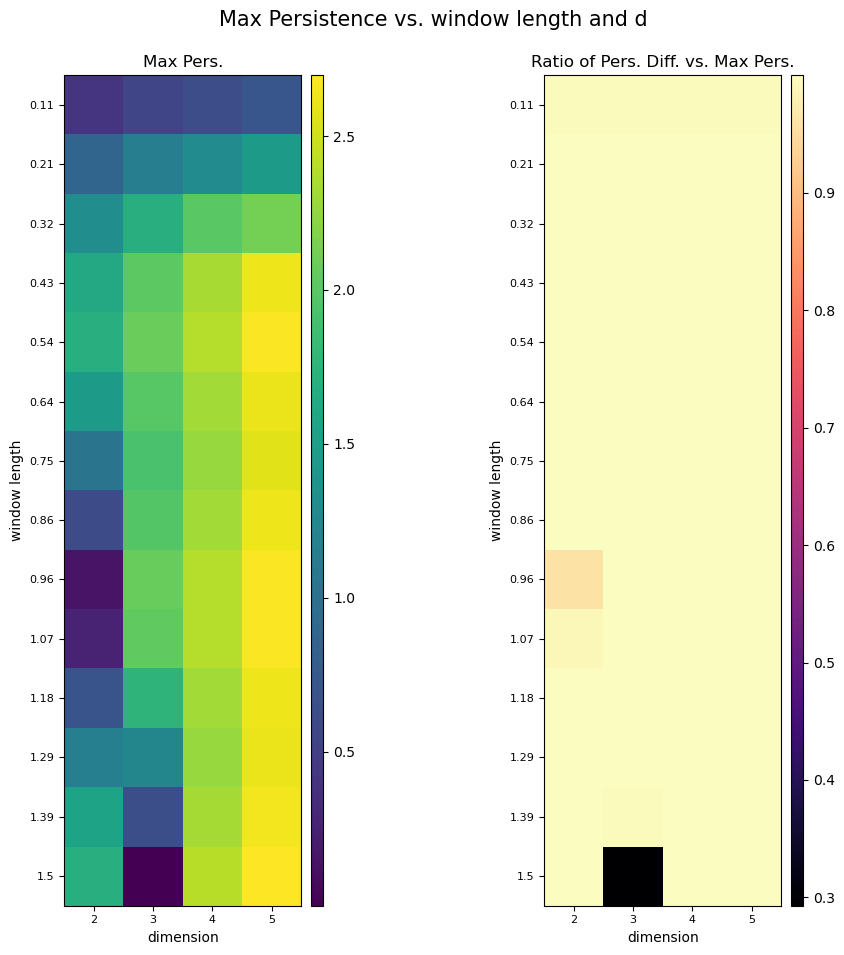

In [98]:
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.axes_grid1 import make_axes_locatable

plt.gcf().clear()
fig, axs = plt.subplots(1,2, figsize = (10,10))

ticksize = 8

im1 = axs[0].imshow(mpers_results)

axs[0].set_xlabel('dimension')
axs[0].set_xticks(np.arange(len(dim_test_values)))
axs[0].set_xticklabels(labels = list(dim_test_values),fontsize = ticksize)

axs[0].set_ylabel('window length')
axs[0].set_yticks(np.arange(len(window_length_test_values)))
axs[0].set_yticklabels(labels = list(np.around(window_length_test_values/T,2)),fontsize = ticksize)

axs[0].set_title('Max Pers.')

divider1 = make_axes_locatable(axs[0])
cax1 = divider1.append_axes('right', size='5%', pad=0.1)
fig.colorbar(im1,cax1,orientation = 'vertical')

### Do the other plot ###

im2 = axs[1].imshow(np.divide(top_diff_results,mpers_results),cmap = plt.cm.magma)

axs[1].set_xlabel('dimension')
axs[1].set_xticks(np.arange(len(dim_test_values)))
axs[1].set_xticklabels(labels = list(dim_test_values), fontsize = ticksize)


axs[1].set_ylabel('window length')
axs[1].set_yticks(np.arange(len(window_length_test_values)))
axs[1].set_yticklabels(labels = list(np.around(window_length_test_values/T,2)),fontsize = ticksize)
axs[1].set_title('Ratio of Pers. Diff. vs. Max Pers.')

divider2 = make_axes_locatable(axs[1])
cax2 = divider2.append_axes('right', size='5%', pad=0.1)
fig.colorbar(im2,cax2)

fig.tight_layout(rect=[0, 0.03, 1, 0.95])

fig.suptitle('Max Persistence vs. window length and d', fontsize = 15)
plt.savefig('periodic_baseline.png')

plt.show()

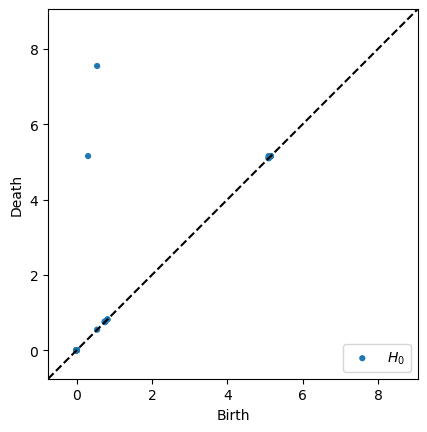

In [50]:
from persim import plot_diagrams

plot_diagrams(PD_results[2,3])

### Utilize some sort of multidimensional scaling?

In [76]:
wl = 0.75
swe = sliding_window(ys, d=4, tau= int(wl/(d*step_size)) )

In [77]:
from sklearn.manifold import MDS

embedding = MDS(n_components=3)
X_transformed = embedding.fit_transform(np.array(swe)[:800,:])
X_transformed.shape

(800, 3)

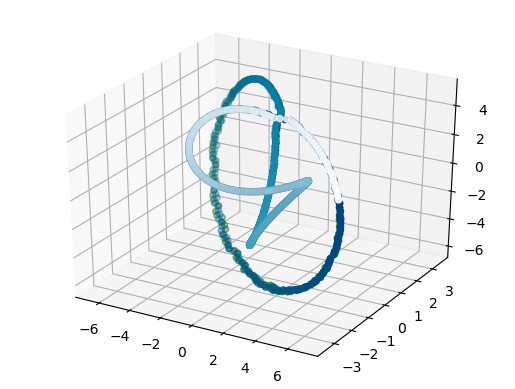

In [79]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_transformed[:,0],X_transformed[:,1],X_transformed[:,2],
           c = np.linspace(0,1,X_transformed.shape[0]),
           cmap = plt.cm.ocean)